<h2>General Definitions</h2>

In [1]:
#Packages
import numpy as np
import matplotlib.pyplot as plt
#Static variables
#Length of string to be evolved
STRING_LENGTH = 40
#Possible Characters
ALPHABET = ["1","0"]
#Maximum number of generations without improvement
MAX_GEN = 10
#Maximum population size
MAX_POPULATION = 1280
#Initial Pop:
INITIAL_POPULATION = 10
#Smallest difference in population size to explore
MIN_RES = 10
#Number of runs for reliable results
NUM_RUNS = 20
#Threshold for number of runs out of NUM_RUNS that need to be successfull
THRESH_NUM = 19
#Uniform crossover probability of inheriting from parent 1, where 1 denotes 100%
UNICROSS = 0.5
#Deceptive Trap Function Mapping
DECEPTIVE = {
    4:4,3:0,2:1,1:2,0:3
}
#Non-Deceptive Trap Function Dict
NON_DECEPTIVE = {
    4:4,3:0,2:0.5,1:1,0:1.5
}
#Block size for trap functions
BLOCK_SIZE = 4


In [2]:
#Crossover Functions

'''
Input: parent1, parent2 two strings of equal length
iterate bitwise over parent string to create child1 and child2. 
For child1 for each bit choose randomly whether to inherit from parent1 or parent2, make opposite choice for child2
'''
def uniformCrossover(parent1,parent2):
    assert(len(parent1)==len(parent2))
    r,c1,c2 = np.random.random_sample((len(parent1),)),"",""
    for i in range(0,len(parent1)):
        if(r[i]>UNICROSS):
            c1+=(parent1[i])
            c2+=(parent2[i])
        else:
            c1+=(parent2[i])
            c2+=(parent1[i])        
    return(c1,c2)

'''
Input: parent1, parent2 two strings of equal length
Randomly choose two indexes, child1 receives information between theese indices from parent2, information outside of theese indices from parent1. Flip for child2

'''
def twoPointCross(parent1,parent2):
    assert(len(parent1)==len(parent2))
    i1 = np.random.randint(len(parent1))
    i2 = np.random.randint(i1,len(parent1))
    c1_1=parent1[0:i1]
    c2_1=parent2[0:i1]
    c1_2=parent2[i1:i2]
    c2_2=parent1[i1:i2]
    c1_3=parent1[i2::]
    c2_3=parent2[i2::]
    c1=c1_1+c1_2+c1_3
    c2=c2_1+c2_2+c2_3
    return c1,c2
        
#Some basic tests
print(uniformCrossover("AAAAAAAAAAAA","BBBBBBBBBBBB"))
print(uniformCrossover("AAAAAAAGGGGGG","BBBBBBBCCCCCC"))
#print(uniformCrossover("AAAAAAAGGGG","BBBBBBOOOOOO")) # -correctly throws error due to missmatched link
print(twoPointCross("AAAAAAAAAAAA","BBBBBBBBBBBB"))
print(twoPointCross("AAAAAAAGGGGGG","BBBBBBBCCCCCC"))
#print(twoPointCross("AAAAAAAGGGG","BBBBBBOOOOOO")) #-correctly throws error due to missmatched link


('AABABABABAAA', 'BBABABABABBB')
('ABAABBBGGCGCG', 'BABBAAACCGCGC')
('AAAAAAAABBAA', 'BBBBBBBBAABB')
('AAAAAAAGGGGCG', 'BBBBBBBCCCCGC')


In [3]:
#Fitness Functions

def counting_ones(sequ,mapping=NON_DECEPTIVE):
    res = 0
    for e in sequ:
        if(e=="1"):
            res+=1
    return res

'''
Given a sequence sequ, and a mapping (NON_DECEPTIVE or DECEPTIVE) calculate the fittness of the sequence
'''
def tightlyLinkedTrapFunction(sequ,mapping=NON_DECEPTIVE):
    res = 0
    for i in range(0,int(len(sequ)/BLOCK_SIZE)):
        si = i*BLOCK_SIZE
        ei = si+BLOCK_SIZE
        block = sequ[si:ei]
        block_fittness = mapping[counting_ones(block)]
        #print(block,block_fittness,res)
        res+=block_fittness
    return res

def looslyLinkedTrapFunction(sequ,mapping=NON_DECEPTIVE):
    n_blocks = int(len(sequ)/BLOCK_SIZE)
    res = 0
    for i in range(0,n_blocks):
        block = ""
        for j in range(0,BLOCK_SIZE):
            #print(i+n_blocks*j)
            block+=sequ[i+n_blocks*j]
        #print(block)
        block_fittness = mapping[counting_ones(block)]
        res+=block_fittness
    return res
        

#Some tests
assert(counting_ones("1111000011110000")==8)
assert(counting_ones("0000000000000000")==0)
assert(counting_ones("0000000000000111")==3)
assert(counting_ones("1111111111111111")==16)

assert(tightlyLinkedTrapFunction("1111000011110000",DECEPTIVE)==14)
assert(tightlyLinkedTrapFunction("1111000011110000",NON_DECEPTIVE)==11)
assert(tightlyLinkedTrapFunction("0000000000000000",DECEPTIVE)==12)
assert(tightlyLinkedTrapFunction("0000000000000000",NON_DECEPTIVE)==6)
assert(tightlyLinkedTrapFunction("0000011100000111",DECEPTIVE)==6)
assert(tightlyLinkedTrapFunction("0000011100000111",NON_DECEPTIVE)==3)
assert(tightlyLinkedTrapFunction("00000001001101111111",DECEPTIVE)==10)
assert(tightlyLinkedTrapFunction("00000001001101111111",NON_DECEPTIVE)==7)

assert(looslyLinkedTrapFunction("1111000011110000",DECEPTIVE)==4)#
assert(looslyLinkedTrapFunction("1111000011110000",NON_DECEPTIVE)==2)
assert(looslyLinkedTrapFunction("0000000000000000",DECEPTIVE)==12)
assert(looslyLinkedTrapFunction("0000000000000000",NON_DECEPTIVE)==6)
assert(looslyLinkedTrapFunction("0111001100010000",DECEPTIVE)==6)
assert(looslyLinkedTrapFunction("0111001100010000",NON_DECEPTIVE)==3)
assert(looslyLinkedTrapFunction("1111011100110001",DECEPTIVE)==7)
assert(looslyLinkedTrapFunction("1111011100110001",NON_DECEPTIVE)==5.5)
assert(looslyLinkedTrapFunction("11111011110011100011",DECEPTIVE)==11) #1,2,3,4,4
assert(looslyLinkedTrapFunction("11111011110011100011",NON_DECEPTIVE)==9.5) #1,2,3,4,4
assert(looslyLinkedTrapFunction("01111001110001100001",DECEPTIVE)==10)#0,1,2,3,4
assert(looslyLinkedTrapFunction("01111001110001100001",NON_DECEPTIVE)==7)#0,1,2,3,4

In [7]:
#GENETIC ALGORITHM

#Function to generate a random string of length STRING_LENGTH, from characters in the given ALPHABET
def randstring(length=STRING_LENGTH,alphabet=ALPHABET):
    ints = np.random.randint(0, high=len(ALPHABET), size=(length,), dtype=int)
    res=""
    for i in ints:
        res+=alphabet[i]
    return res

#Function to test bisection search, emulates the returned value
def genetic_search_test(population_size, expected_threshold=250):
    if(population_size>=expected_threshold):
        return "1"*STRING_LENGTH,0
    else:
        return "0"*STRING_LENGTH,0

def proportion_score(population):
    number_of_1 = 0
    total_length = 0
    for individual in population:
        number_of_1 += individual.count("1")
        total_length += len(individual)
    return number_of_1 / total_length

#Genetic Search of a population. 
def genetic_search(population_size,fittness_function=counting_ones,crossover_function=uniformCrossover,mapping=NON_DECEPTIVE):
    #Randomly initiate population_size strings of 1s and 0s
    population = []
    for i in range(0,population_size):
        population.append(randstring())
    optimal = False
    n_generations = 0
    proportion = []
    proportion.append(proportion_score(population))
    not_changed = 0 #count of generations where no single offspring improved over its parents
    res = [] #average fittness
    while(not optimal and not_changed<MAX_GEN):
        n_population = []
        n_generations +=1
        ftn_counter = 0
        improvement_counter = 0 #count instances of improving child generations
        #1. Randomly shuffle the population P (t).
        np.random.shuffle(population)
        for i in range(0,len(population)-1,2):
            #2. Pair solution 1 with solution 2, solution 3 with solution 4, etc. ...
            p1,p2 = population[i],population[i+1]
            #3. Each parent pair creates 2 offspring solutions using crossover.
            c1,c2 = crossover_function(p1,p2)
            #4. Family competition: the best 2 solutions of each family of 4 are copied to the next population P (t + 1).
            scores = [(fittness_function(x,mapping=mapping),x) for x in [c1,c2,p1,p2]]
            #
            if((scores[0][0]>scores[2][0] and scores[0][0]>scores[3][0]) or (scores[1][0]>scores[2][0] and scores[1][0]>scores[3][0])):
                improvement_counter+=1
            #We can use sort, because sort is stable, if two elements are equal their original order will be preserved, this satisifies 
            #the requirement: When a parent and a child have the same (best) fitness, the child is copied to the next generation
            scores.sort(reverse=True,key=lambda x: x[0])
           
            
            #5 The GA is stopped when one of the new offspring solutions is the global optimum
            if(scores[0][0]>=STRING_LENGTH):
                proportion.append(proportion_score(n_population))  # TODO: do I have to update the population here first? right now we return directly if we find the optimum without updating the population, so the proportion score in not correct
                return(scores[0][1],n_generations, proportion)
            
            n_population.extend([scores[0][1],scores[1][1]])
            ftn_counter+=(scores[0][0]+scores[1][0])
        proportion.append(proportion_score(n_population))
        avg_ftn = ftn_counter/population_size
        #print(len(n_population),len(n_population[0]),fittness_function(n_population[0]),n_population[0])
        res.append(avg_ftn)
        #Count instances when a new offspring solution with a higher fitness than its parents has been created.
        if(improvement_counter>0):
            not_changed=0
        else:
            not_changed+=1
        population=n_population
    
    return(n_population[0],n_generations, proportion)

"""
Modified Bisection Search for smallest valid population size
A valid population_size is a population_size where out of NUM_RUNS (20) runs THRESHOLD (19) runs converge on the optimum solution

Phase one: double population size starting from INITIAL_POPULATION until a valid population size is found, or MAX_POPULATION is exceeded in which case we return -1
Phase two: perform binary search between the lower_bound (highest invalid population) and upper bound (smallest valid population). 
Binary Search ends when subsequent adjustments are smaller than MIN_RES (10)
"""
def bisection_search(mode="test",expected_threshold=250,fittness_function=counting_ones,crossover_function=uniformCrossover,mapping=NON_DECEPTIVE):
    current_pop = INITIAL_POPULATION
    res = [] #to store explored population sizes
    lower_bound =0 #stores highest value that did not succeed
    upper_bound = MAX_POPULATION+1 #stores lowest value that did succeed
    while(current_pop<=MAX_POPULATION):
        res.append(current_pop)
        #STEP 1: Check if current population size is valid and adjust boundaries.
        successes = 0 #counting the succesfull runs where the genetic_search converged at the global maximum
        for i in range(0,NUM_RUNS):
            if mode == "test":
                converged_genes,n_generations= genetic_search_test(current_pop,expected_threshold)
            else:
                converged_genes,n_generations, _ = genetic_search(current_pop,fittness_function=fittness_function,crossover_function=crossover_function,mapping=mapping)
            
            if(counting_ones(converged_genes)>=STRING_LENGTH): #Check if optimal solution was returned
                    successes+=1
        if(successes>=THRESH_NUM):
            upper_bound=current_pop
        else:
            lower_bound = current_pop
        #STEP 2: Adjust search parameters.
        if(upper_bound==(MAX_POPULATION+1)): #If the upper bound did not previously change, continue doubling population
            current_pop=current_pop*2
        else: #regular binary search in between found boundaries
            dif = (upper_bound-lower_bound)//2
            if(dif<MIN_RES): #Stop searching once we are within MIN_RES (10) of the smallest possible valid population size
                return res,upper_bound
            current_pop=lower_bound+dif
    return res,-1

#More tests

assert(bisection_search(mode="test",expected_threshold=250)==([10, 20, 40, 80, 160, 320, 240, 280, 260, 250],250))
assert(bisection_search(mode="test",expected_threshold=100)==([10, 20, 40, 80, 160, 120, 100, 90],100))
assert(bisection_search(mode="test",expected_threshold=1285)==([10, 20, 40, 80, 160, 320, 640,1280],-1))
assert(bisection_search(mode="test",expected_threshold=853)==([10, 20, 40, 80, 160, 320, 640, 1280, 960, 800, 880, 840, 860, 850],860))

print(randstring())
print(randstring())

print(genetic_search(200,fittness_function=tightlyLinkedTrapFunction,crossover_function=uniformCrossover,mapping=NON_DECEPTIVE))



1001100010111011010010100000000001101110
1100101111011000110110100100101011110000
('1111111111111111111111111111111111111111', 30, [0.4985, 0.492625, 0.494375, 0.502875, 0.509125, 0.519375, 0.53125, 0.548375, 0.55475, 0.565625, 0.575, 0.587, 0.60575, 0.61725, 0.625625, 0.638, 0.648625, 0.6625, 0.675125, 0.689125, 0.706, 0.718625, 0.729375, 0.743, 0.75675, 0.767375, 0.784125, 0.79675, 0.808875, 0.821625, 0.8216666666666667])


In [29]:
#EXPERIMENT 1 
#with uniform crossover
print(bisection_search(mode="run",fittness_function=counting_ones,crossover_function=uniformCrossover))

([10, 20, 40, 30], 30)


In [16]:
#EXPERIMENT 1 
#with 2X crossover
print(bisection_search(mode="run",fittness_function=counting_ones,crossover_function=twoPointCross))


([10, 20, 40, 80, 60, 70], 80)


In [5]:
#EXPERIMENT 2 Tightly linked deceptive trap-function uniform
# print(bisection_search(mode="run",fittness_function=tightlyLinkedTrapFunction,crossover_function=uniformCrossover,mapping=DECEPTIVE))


In [18]:
#EXPERIMENT 2 Tightly linked deceptive trap-function 2x
print(bisection_search(mode="run",fittness_function=tightlyLinkedTrapFunction,crossover_function=twoPointCross,mapping=DECEPTIVE))


([10, 20, 40, 80, 160, 120, 140, 150], 160)


In [19]:
#EXPERIMENT 3 Tightly linked non_deceptive trap-function uniform
print(bisection_search(mode="run",fittness_function=tightlyLinkedTrapFunction,crossover_function=uniformCrossover,mapping=NON_DECEPTIVE))


([10, 20, 40, 80, 160, 320, 240, 200, 180, 170], 180)


In [20]:
#EXPERIMENT 3 Loosly linked deceptive trap-function 2x
print(bisection_search(mode="run",fittness_function=tightlyLinkedTrapFunction,crossover_function=twoPointCross,mapping=NON_DECEPTIVE))


([10, 20, 40, 80, 160, 120, 100, 110], 120)


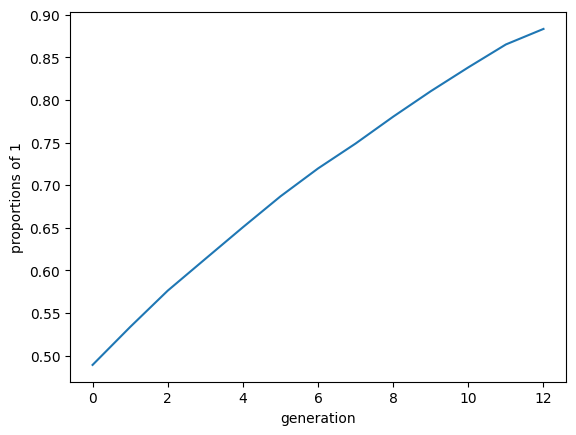

In [12]:
converged_genes,n_generations, proportion = genetic_search(200)
assert(n_generations == len(proportion) - 1) # -1 because we have 0's generation
plt.plot(proportion)
plt.ylabel('proportions of 1s')
plt.xlabel('generation')
plt.show()

In [21]:
#EXPERIMENT 4 Loosly linked deceptive trap-function uniform
#print(bisection_search(mode="run",fittness_function=looslyLinkedTrapFunction,crossover_function=uniformCrossover,mapping=DECEPTIVE))


In [22]:
#EXPERIMENT 4 Loosly linked deceptive trap-function 2x
#print(bisection_search(mode="run",fittness_function=looslyLinkedTrapFunction,crossover_function=twoPointCross,mapping=DECEPTIVE))


In [23]:
#EXPERIMENT 5 Loosly linked deceptive trap-function uniform
#print(bisection_search(mode="run",fittness_function=looslyLinkedTrapFunction,crossover_function=uniformCrossover,mapping=NON_DECEPTIVE))


In [24]:
#EXPERIMENT 5 Loosly linked deceptive trap-function 2x
#print(bisection_search(mode="run",fittness_function=looslyLinkedTrapFunction,crossover_function=twoPointCross,mapping=NON_DECEPTIVE))
